In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pandas as pd
import pickle

from plotter import *

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.2

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [3]:
year = '2017'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

ddbthr = 0.64

In [4]:
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
coffeadir_prefix = '/myeosdir/ggf-vbf/outfiles-ddb2/'

repickle = True
# Check if pickle exists, remove it if it does
picklename = year+'/cutflow.pkl'
if os.path.isfile(picklename):
    repickle = False

In [5]:
cutflow = pickle.load(open(year+'/cutflow.pkl','rb'))
cutflow = cutflow.sum('genflavor').integrate('region','muoncontrol')

In [6]:
cutflow.integrate('process','muondata').values()

{(): array([2.9164308e+07, 1.6151331e+07, 1.5599882e+07, 1.5572901e+07,
        5.3629900e+05, 5.3629900e+05, 1.7552300e+05, 4.8836000e+04,
        7.6880000e+03, 6.9120000e+03, 3.7220000e+03, 2.1000000e+01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00])}

In [7]:
cutflow.integrate('process','ttbar').values()

{(): array([1.60568646e+07, 1.60568646e+07, 1.60568646e+07, 1.60388813e+07,
        3.04317271e+05, 3.04317271e+05, 1.13865087e+05, 5.50176179e+04,
        8.79411839e+03, 6.16420911e+03, 3.46178827e+03, 2.49713469e+01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])}

In [8]:
df1 = pd.DataFrame([])

df1['QCD'] = cutflow.values()[('QCD',)]
df1['Wjets'] = cutflow.values()[('Wjets',)]
df1['Zjets'] = cutflow.values()[('Zjets',)]
df1['VV'] = cutflow.values()[('VV',)]
df1['ttbar'] = cutflow.values()[('ttbar',)]
df1['singlet'] = cutflow.values()[('singlet',)]
df1['data'] = cutflow.values()[('muondata',)]

df1 = df1.astype('int')[:12]
df1.index=['nothing','muontrigger','lumimask','metfilter','minjetkinmu', 'jetid', 'n2ddt', 'ak4btagMedium08', 'onemuon', 'muonkin', 'muonDphiAK8','ddbpass']
df1[1:12].to_latex(buf=year+'/cutflow-muoncr.tex')

In [9]:
df1

,QCD,Wjets,Zjets,VV,ttbar,singlet,data
nothing,840306638,15693856,1829470,1689611,16056864,3983803,29164308
muontrigger,840306638,15693856,1829470,1689611,16056864,3983803,16151331
lumimask,840306638,15693856,1829470,1689611,16056864,3983803,15599882
metfilter,838508867,15667695,1823776,1687963,16038881,3980052,15572901
minjetkinmu,29665292,491339,202573,6878,304317,32568,536299
jetid,29665292,491339,202573,6878,304317,32568,536299
n2ddt,7637940,193956,91579,3957,113865,15206,175523
ak4btagMedium08,617971,13865,10381,344,55017,7672,48836
onemuon,3725,829,198,17,8794,975,7688
muonkin,601,533,99,7,6164,600,6912


In [10]:
templates_mc = pickle.load(open(year+'/templates-mc.pkl','rb')).integrate('region','muoncontrol').integrate('systematic','nominal').sum('pt1','genflavor').integrate('mjj',overflow='allnan')
templates_data = pickle.load(open(year+'/templates-data.pkl','rb')).integrate('region','muoncontrol').integrate('systematic','nominal').sum('pt1','genflavor').integrate('mjj',overflow='allnan')

In [11]:
templates_mc.sum('msd1').values()

{('ZH',): array([0.14973315, 0.00225279, 0.00038142]),
 ('WH',): array([0.46459573, 0.02443302, 0.00623868]),
 ('ttH',): array([5.75931632, 0.29543697, 0.0741754 ]),
 ('VBF',): array([0.03414412, 0.        , 0.        ]),
 ('ggF',): array([0., 0., 0.]),
 ('ggF-powheg',): array([0.4298711, 0.       , 0.       ]),
 ('QCD',): array([454.2559105,   0.       ,   0.       ]),
 ('VV',): array([4.67309544e+00, 2.03030517e-03, 0.00000000e+00]),
 ('Wjets',): array([2.13069148e+02, 2.09646386e-01, 1.65950633e-02]),
 ('Zjets',): array([32.48213567,  0.22715723,  0.        ]),
 ('ttbar',): array([3.43584476e+03, 2.31241261e+01, 1.84722078e+00]),
 ('singlet',): array([4.03129287e+02, 1.21749068e+00, 1.80103805e-01])}

In [12]:
templates_data.sum('msd1').values()

{('data',): array([3.066e+03, 1.300e+01, 3.000e+00]),
 ('muondata',): array([3.701e+03, 1.800e+01, 3.000e+00])}

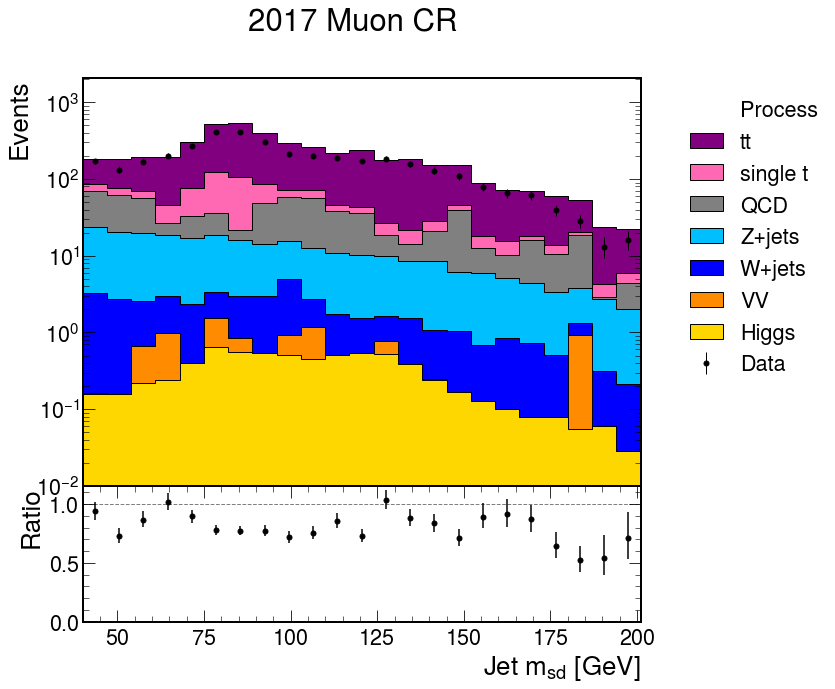

In [13]:
fig = plt.figure()
plt.suptitle(year + ' Muon CR')

ax1 = fig.add_subplot(4,1,(1,3))
plt.subplots_adjust(hspace=0)

# https://matplotlib.org/stable/gallery/color/named_colors.html                                                       
labels = ['Higgs','VV','W+jets','Z+jets','QCD','single t','tt']
mc = ['ttbar','singlet','QCD','Wjets','Zjets','VV',['ZH','WH','ttH','ggF']]                                                     
colors=['purple','hotpink','gray','deepskyblue','blue','darkorange','gold']

mc = [x for x in reversed(mc)]
colors = [x for x in reversed(colors)]
labels = [x for x in reversed(labels)]                                                                  
        
hmc = templates_mc.sum('ddb1')
hdata = templates_data.sum('ddb1')
# Plot stacked hist                                                                                                   
hist.plot1d(hmc,order=mc,stack=True,fill_opts={'color':colors,'edgecolor':'black'})                              
# Overlay data                                                                                                            
hist.plot1d(hdata.integrate('process','muondata'),error_opts={'marker':'o','color':'k','markersize':5}) 
labels = ['Process'] + labels + ['Data']

ax1.get_xaxis().set_visible(False)                                                                                               
plt.legend(labels=labels,bbox_to_anchor=(1.05, 1), loc='upper left')    

allweights = hist.export1d(hdata.integrate('process','muondata')).numpy()[0] 
ax1.set_yscale('log')
ax1.set_ylim(0.01,5*np.amax(allweights)) 

# ratio                                                                                                                   
ax2 = fig.add_subplot(4,1,(4,4))
hist.plotratio(num=hdata.integrate('process','muondata'),denom=hmc.integrate('process'),ax=ax2,unc='num',error_opts={'marker':'o','color':'k','markersize':5},guide_opts={})
ax2.set_ylabel('Ratio')    
ax2.set_xlabel('Jet $m_{sd}$ [GeV]') 
ax2.set_xlim(ax1.get_xlim())

name = year+'/datamc_mucr_msd1'
png_name = name+'.png'
plt.savefig(png_name,bbox_inches='tight')

pdf_name = name+'.pdf'
plt.savefig(pdf_name,bbox_inches='tight')

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=process) instance at 0x7f5516afa550>
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=process) instance at 0x7f5516afa550>
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw


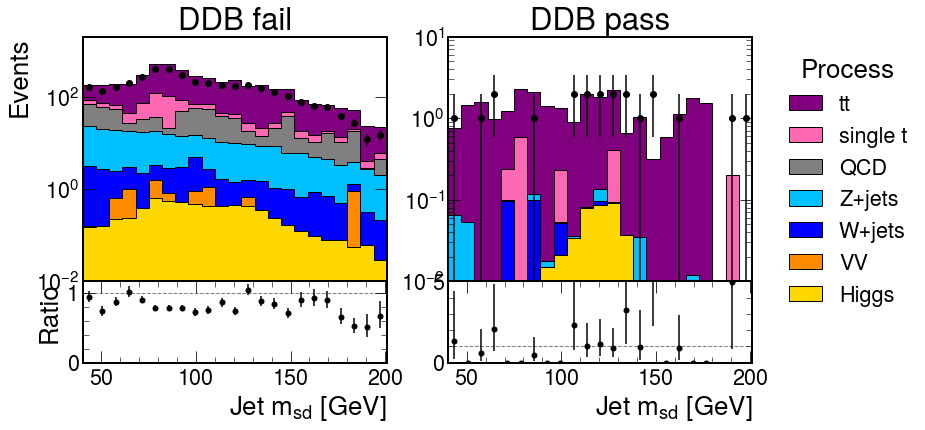

In [14]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3,1]},figsize=(12,6))
plt.subplots_adjust(hspace=0)
    
# https://matplotlib.org/stable/gallery/color/named_colors.html                                                       
labels = ['Higgs','VV','W+jets','Z+jets','QCD','single t','tt']
mc = ['ttbar','singlet','QCD','Wjets','Zjets','VV',['ZH','WH','ttH','ggF']]                                                     
colors=['purple','hotpink','gray','deepskyblue','blue','darkorange','gold']

mc = [x for x in reversed(mc)]
colors = [x for x in reversed(colors)]
labels = [x for x in reversed(labels)]  
    
hpassmc = templates_mc.integrate('ddb1',int_range=slice(0.64,1))
hfailmc = templates_mc.integrate('ddb1',int_range=slice(0,0.64))

hpassdata = templates_data.integrate('ddb1',int_range=slice(0.64,1))
hfaildata = templates_data.integrate('ddb1',int_range=slice(0,0.64))
                           
hist.plot1d(hfailmc,order=mc,stack=True,fill_opts={'color':colors,'edgecolor':'black'},ax=ax1)
ax1.get_legend().remove()
muondata = hfaildata.integrate('process','muondata')
x=muondata.axes()[0].centers()
bins=muondata.axes()[0].edges()
ax1.errorbar(x=x,y=muondata.values()[()],yerr=np.sqrt(muondata.values()[()]),marker='o',linestyle='',color='black')

ax1.get_xaxis().set_visible(False)

allweights =  hist.export1d(hfaildata.integrate('process','muondata')).numpy()[0] 
ax1.set_yscale('log')
ax1.set_ylim(0.01,5*np.amax(allweights))         
    
ax1.title.set_text("DDB fail")

# ratio                                                                                                                   
hist.plotratio(num=hfaildata.integrate('process','muondata'),denom=hfailmc.integrate('process',mc),unc='num',error_opts={'marker':'o','color':'k','markersize':5},guide_opts={},ax=ax3)   
ax3.set_ylabel("Ratio")
if ax3.get_ylim()[1] > 5:
    ax3.set_ylim(ax3.get_ylim()[0],5)
ax3.set_xlabel('Jet $m_{sd}$ [GeV]') 
ax3.set_xlim(ax1.get_xlim())
                                                                                        
hist.plot1d(hpassmc,order=mc,stack=True,fill_opts={'color':colors,'edgecolor':'black'},ax=ax2,legend_opts={'labels':labels,'bbox_to_anchor':(1.05, 1),'loc':'upper left'})
muondata = hpassdata.integrate('process','muondata')
x=muondata.axes()[0].centers()
bins=muondata.axes()[0].edges()
ax2.errorbar(x=x,y=muondata.values()[()],yerr=np.sqrt(muondata.values()[()]),marker='o',linestyle='',color='black') 
    
ax2.title.set_text("DDB pass")
    
ax2.set_xlim(ax1.get_xlim())
ax2.get_xaxis().set_visible(False)    
ax2.set_ylabel("")
allweights =  hist.export1d(hpassdata.integrate('process','muondata')).numpy()[0] 
ax2.set_yscale('log')
ax2.set_ylim(0.01,5*np.amax(allweights))   

# ratio                                                                                                                   
hist.plotratio(num=hpassdata.integrate('process','muondata'),denom=hpassmc.integrate('process',mc),unc='num',error_opts={'marker':'o','color':'k','markersize':5},guide_opts={},ax=ax4)  
    
ax4.set_ylabel("")
if(ax4.get_ylim()[1] > 5):
    ax4.set_ylim(ax4.get_ylim()[0],5)
ax4.set_xlabel('Jet $m_{sd}$ [GeV]') 
ax4.set_xlim(ax1.get_xlim())

name = year+'/datamc_mucr_msd1'
png_name = name+'_PF.png'
plt.savefig(png_name,bbox_inches='tight')

pdf_name = name+'_PF.pdf'
plt.savefig(pdf_name,bbox_inches='tight')